# Insurance Project 

The goals of this project are: 
1) Analyze the client's insurance charges 
2) Suggest Client's subscription fees 
3) Predict the lost profit ratio (use the suggested fees as paid money) 

In [615]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import xgboost
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
#evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,\
                            r2_score,mean_absolute_percentage_error


In [458]:
data = pd.read_csv("./canada/insurance.csv")

In [459]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,29,female,27.900,0,yes,southwest,16884.92400
1,28,male,33.770,1,no,southeast,1725.55230
2,38,male,33.000,3,no,southeast,4449.46200
3,43,male,22.705,0,no,northwest,21984.47061
4,42,male,28.880,0,no,northwest,3866.85520


In [460]:
len(data.charges.unique())

1337

In [461]:
# To Do: 
# Change age to intervals -- Done
# Encode age -- Done
# Encode sex -- Done
# Change BMI to intervals -- Done
# Encode BMI -- Done
# Encode the region -- Done
# Cluster the charges! 
# Encoding for all features
# Run an ML Code for prediction
# Run a few metrics on the Dashboard

# Age

In [462]:
# Age < 18
# Age 18-25
# Age 26-34
# Age 35-44
# Age 45-54
# Age 55-64
# Age ≥65
def age_transformation(age):
    if age < 18: return 0
    if age < 26: return 1
    if age < 35: return 2
    if age < 45: return 3
    if age < 55: return 4
    if age < 65: return 5
    if age >= 65: return 6
    

In [463]:
data["age_embedded"] = data.age.apply(age_transformation)

# Sex

In [464]:
data["sex_embedded"] = data.sex.apply(lambda x: 0 if x == "female" else 1)

In [465]:
data.head()

,age,sex,bmi,children,smoker,region,charges,age_embedded,sex_embedded
0,29,female,27.900,0,yes,southwest,16884.92400,2,0
1,28,male,33.770,1,no,southeast,1725.55230,2,1
2,38,male,33.000,3,no,southeast,4449.46200,3,1
3,43,male,22.705,0,no,northwest,21984.47061,3,1
4,42,male,28.880,0,no,northwest,3866.85520,3,1


# Smoker

In [466]:
data["smoker_embedded"] = data.smoker.apply(lambda x: 1 if x == "yes" else 0)

# BMI 

In [467]:
# Below 18.5	Underweight
# 18.5 – 24.9	Healthy Weight
# 25.0 – 29.9	Overweight
# 30.0 and Above	Obesity
def bmi_transformation(bmi):
    if bmi < 18.5: return "underweight"
    if bmi < 25: return "healthy weight"
    if bmi < 30: return "overweight"
    if bmi >= 30: return "Obesity"


In [468]:
data["bmi_embedded"] = data.bmi.apply(bmi_transformation)

In [469]:
data_encoded = data.join(pd.get_dummies(data["bmi_embedded"],  dtype="uint8"))

In [470]:
data_encoded = data_encoded.drop("bmi_embedded", axis=1)

In [471]:
data_encoded.head()

,age,sex,bmi,children,smoker,region,charges,age_embedded,sex_embedded,smoker_embedded,Obesity,healthy weight,overweight,underweight
0,29,female,27.900,0,yes,southwest,16884.92400,2,0,1,0,0,1,0
1,28,male,33.770,1,no,southeast,1725.55230,2,1,0,1,0,0,0
2,38,male,33.000,3,no,southeast,4449.46200,3,1,0,1,0,0,0
3,43,male,22.705,0,no,northwest,21984.47061,3,1,0,0,1,0,0
4,42,male,28.880,0,no,northwest,3866.85520,3,1,0,0,0,1,0


# Region

In [472]:
data_encoded = data_encoded.join(pd.get_dummies(data["region"], dtype="uint8"))

In [473]:
data_encoded.iloc[:, 6].min(), data_encoded.iloc[:, 6].max(), data_encoded.iloc[:, 6].mean()

(1121.8739, 63770.42801, 13270.422265141257)

In [474]:
data_encoded['charges'].value_counts(bins = 3, sort=False)

(1059.224, 22004.725]     1099
(22004.725, 42887.577]     185
(42887.577, 63770.428]      54
Name: count, dtype: int64

In [475]:
X = data_encoded.iloc[:, [3, 4, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17]]


In [476]:
X.head()

,children,smoker,age_embedded,sex_embedded,smoker_embedded,Obesity,healthy weight,overweight,northeast,northwest,southeast,southwest
0,0,yes,2,0,1,0,0,1,0,0,0,1
1,1,no,2,1,0,1,0,0,0,0,1,0
2,3,no,3,1,0,1,0,0,0,0,1,0
3,0,no,3,1,0,0,1,0,0,1,0,0
4,0,no,3,1,0,0,0,1,0,1,0,0


In [477]:
Y = data_encoded.iloc[:, 6].to_numpy()

In [478]:
K=10

In [479]:
kmeans_costs = KMeans(K).fit(Y.reshape(-1, 1))

In [480]:
sorted(kmeans_costs.cluster_centers_[:, 0])

[2410.8222903100796,
 5393.425810040162,
 8825.485809149193,
 12664.092894894515,
 19301.988173017242,
 26155.56816246575,
 35275.30165277778,
 40515.564497547166,
 46668.662849111104,
 60018.235328]

In [481]:
preds = kmeans_costs.predict(data_encoded['charges'].to_numpy().reshape(-1, 1))

In [482]:
list(zip(*np.unique(preds, return_counts=True)))

[(0, 249),
 (1, 54),
 (2, 237),
 (3, 116),
 (4, 248),
 (5, 45),
 (6, 73),
 (7, 5),
 (8, 258),
 (9, 53)]

In [483]:
data_encoded['charges_category'] = preds

In [484]:
data_encoded.head()

,age,sex,bmi,children,smoker,region,charges,age_embedded,sex_embedded,smoker_embedded,Obesity,healthy weight,overweight,underweight,northeast,northwest,southeast,southwest,charges_category
0,29,female,27.900,0,yes,southwest,16884.92400,2,0,1,0,0,1,0,0,0,0,1,3
1,28,male,33.770,1,no,southeast,1725.55230,2,1,0,1,0,0,0,0,0,1,0,8
2,38,male,33.000,3,no,southeast,4449.46200,3,1,0,1,0,0,0,0,0,1,0,0
3,43,male,22.705,0,no,northwest,21984.47061,3,1,0,0,1,0,0,0,1,0,0,3
4,42,male,28.880,0,no,northwest,3866.85520,3,1,0,0,0,1,0,0,1,0,0,8


In [485]:
kmeans = KMeans(K).fit(Y.reshape(-1, 1))

In [486]:
data_encoded["charges_category"]

0       3
1       8
2       0
3       3
4       8
       ..
1333    4
1334    8
1335    8
1336    8
1337    6
Name: charges_category, Length: 1338, dtype: int32

In [487]:
all_features=["children", "age_embedded", "sex_embedded", "Obesity", "smoker_embedded", "healthy weight", "overweight", "underweight",
                     "northeast", "northwest", "southeast", "southwest", "charges"]

<Axes: >

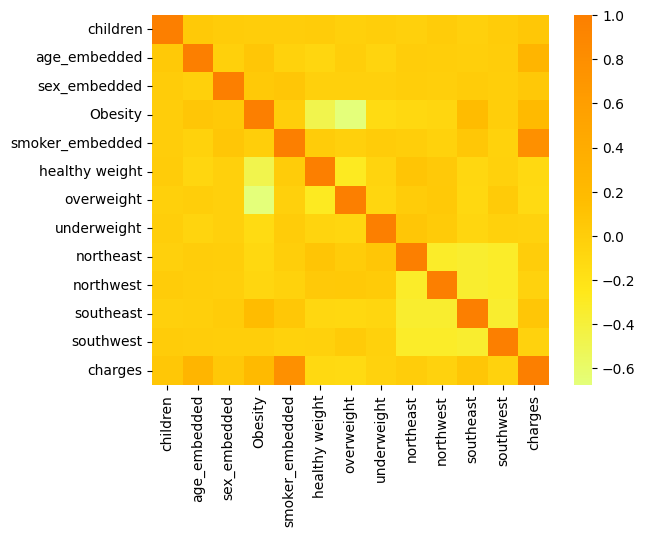

In [488]:
corr = data_encoded[all_features].corr(numeric_only=True)
sns.heatmap(corr,cmap='Wistia',annot=False)

In [489]:
corr

,children,age_embedded,sex_embedded,Obesity,smoker_embedded,healthy weight,overweight,underweight,northeast,northwest,southeast,southwest,charges
children,1.000000,0.047423,0.017163,0.009807,0.007673,0.012675,-0.020039,-0.004592,-0.022808,0.024806,-0.023066,0.021914,0.067998
age_embedded,0.047423,1.000000,-0.018859,0.077435,-0.033692,-0.080562,-0.004519,-0.053376,0.006912,-0.002977,-0.011685,0.008199,0.283195
sex_embedded,0.017163,-0.018859,1.000000,0.047317,0.076185,-0.022690,-0.026460,-0.025927,-0.002425,-0.011156,0.017117,-0.004184,0.057292
Obesity,0.009807,0.077435,0.047317,1.000000,0.000810,-0.475925,-0.674016,-0.130392,-0.098564,-0.082849,0.170445,0.004433,0.199532
smoker_embedded,0.007673,-0.033692,0.076185,0.000810,1.000000,0.019430,-0.020629,0.013803,0.002811,-0.036945,0.068498,-0.036945,0.787251
healthy weight,0.012675,-0.080562,-0.022690,-0.475925,0.019430,1.000000,-0.286298,-0.055386,0.086371,0.038898,-0.090755,-0.030999,-0.106265
overweight,-0.020039,-0.004519,-0.026460,-0.674016,-0.020629,-0.286298,1.000000,-0.078439,0.017441,0.050934,-0.092712,0.027853,-0.120083
underweight,-0.004592,-0.053376,-0.025927,-0.130392,0.013803,-0.055386,-0.078439,1.000000,0.074146,0.030765,-0.075306,-0.026686,-0.044960
northeast,-0.022808,0.006912,-0.002425,-0.098564,0.002811,0.086371,0.017441,0.074146,1.000000,-0.320177,-0.345561,-0.320177,0.006349
northwest,0.024806,-0.002977,-0.011156,-0.082849,-0.036945,0.038898,0.050934,0.030765,-0.320177,1.000000,-0.346265,-0.320829,-0.039905


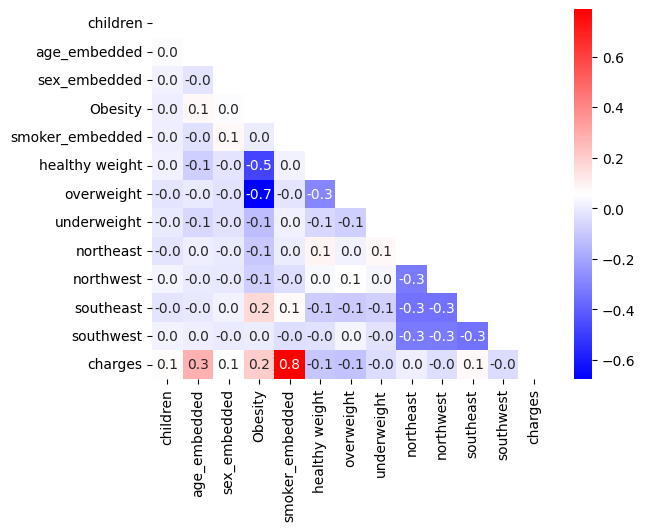

In [490]:
corr_pearson = data_encoded[all_features].corr(method='pearson')
sns.heatmap(corr_pearson, annot=True, fmt=".1f", 
                cmap = 'bwr', 
                mask=np.triu(corr_pearson)); #only display the upper triangle of the correlation matrix
# print(corr_pearson)

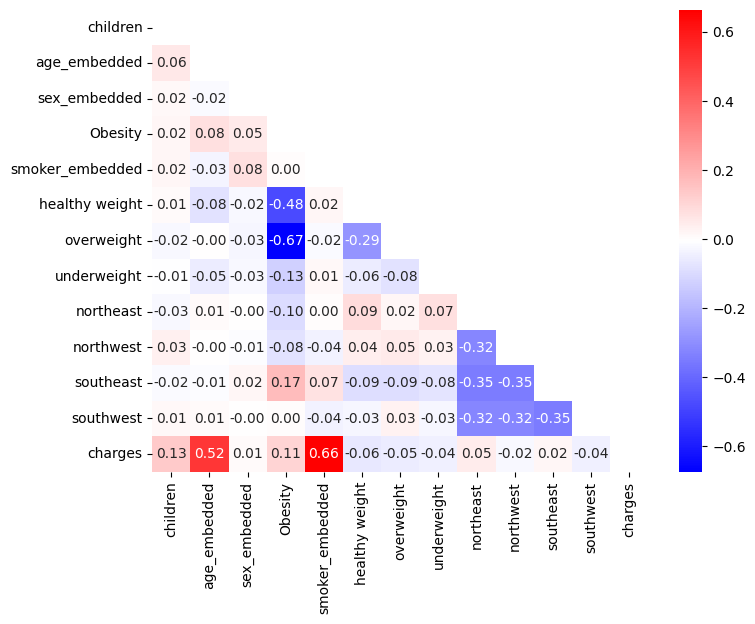

In [491]:
corr_pearson = data_encoded[all_features].corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_pearson, annot=True, fmt=".2f", 
                cmap = 'bwr', 
                mask=np.triu(corr_pearson)); #only display the upper triangle of the correlation matrix
# print(corr_pearson)

# Relevant features: [Smoker, Age, BMI [Obesity, overweight, underweight, healthy weight], Children, sex

In [513]:
selected_features = ["children", "age_embedded", "sex_embedded", "smoker_embedded", "Obesity", "healthy weight", "overweight", "underweight"]
X = data_encoded[selected_features] # all_features[:-1]

In [514]:
X.head()

,children,age_embedded,sex_embedded,smoker_embedded,Obesity,healthy weight,overweight,underweight
0,0,2,0,1,0,0,1,0
1,1,2,1,0,1,0,0,0
2,3,3,1,0,1,0,0,0
3,0,3,1,0,0,1,0,0
4,0,3,1,0,0,0,1,0


# Dataset preps

TypeError: list indices must be integers or slices, not tuple

(array([0.5, 4. , 1. , 1. , 0. , 0.5, 0.5, 0. ]),
 array([0.5, 1. , 1. , 1. , 1. , 0.5, 0.5, 1. ]))

In [785]:
x_train, y_train, x_test, y_test = [], [], [], []

for category in data_encoded['charges_category'].unique():
    x = X[data_encoded['charges_category'] == category].to_numpy()
    y = Y[data_encoded['charges_category'] == category]

    cat_x_train, cat_x_test, cat_y_train, cat_y_test = train_test_split(x,y,test_size=0.2,random_state=23)

    x_train += cat_x_train.tolist()
    y_train += cat_y_train.tolist()
    x_test += cat_x_test.tolist()
    y_test += cat_y_test.tolist()
    

In [786]:
x_train = np.array(x_train, dtype='float')
x_test = np.array(x_test, dtype='float')

In [787]:
x_train[:, 0].min(), x_train[:, 0].max(), x_train[:, 0].mean(), x_train[:, 0].std()

(0.0, 5.0, 1.0955951265229615, 1.231517262429296)

In [788]:
scaler1 = StandardScaler().fit(x_train[:, 0].reshape(-1, 1))
scaler2 = StandardScaler().fit(x_train[:, 1].reshape(-1, 1))

In [789]:
x_train[:, 0] = scaler1.transform(x_train[:, 0].reshape(-1, 1)).squeeze()
x_train[:, 1] = scaler2.transform(x_train[:, 1].reshape(-1, 1)).squeeze()
x_test[:, 0] = scaler1.transform(x_test[:, 0].reshape(-1, 1)).squeeze()
x_test[:, 1] = scaler2.transform(x_test[:, 1].reshape(-1, 1)).squeeze()


In [790]:
x_train[:, 0].min(), x_train[:, 0].max(), x_train[:, 0].mean(), x_train[:, 0].std()

(-0.889630344573316, 3.1704020662895083, 5.327405703918277e-17, 1.0)

In [791]:
x_train[:, 1].min(), x_train[:, 1].max(), x_train[:, 1].mean(), x_train[:, 1].std()

(-1.3877085069528237, 1.4542972069025752, 0.0, 0.9999999999999998)

In [792]:
x_train = x_train.tolist()

In [793]:
len(x_test)/(len(x_train)+len(x_test)), len(x_train), len(x_test), len(x_train) + len(x_test)

(0.20254110612855009, 1067, 271, 1338)

In [794]:
(x_train, y_train) = shuffle(x_train, y_train)

In [795]:
x_train[:5]

[[-0.889630344573316, -1.3877085069528237, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [-0.07762386240075124, -0.677207078488974, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.7343826197718135, 0.033294349974875806, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0],
 [1.5463891019443783, 1.4542972069025752, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.7343826197718135, 0.033294349974875806, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]]

In [796]:
x_test[:5]

array([[-0.07762386, -1.38770851,  1.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ],
       [-0.07762386, -0.67720708,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.73438262, -0.67720708,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ],
       [-0.88963034,  0.03329435,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ],
       [ 0.73438262,  0.74379578,  1.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ]])

In [797]:
lin_reg=linear_model.LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [798]:
y_pred = lin_reg.predict(x_test)
list(zip(y_pred, y_test))[:5]

[(25687.15617905013, 17178.6824),
 (8124.649598800193, 18903.49141),
 (8410.733568232581, 19442.3535),
 (30335.83425908602, 20234.85475),
 (32238.018933171494, 21098.55405)]

In [799]:
y_train_pred= lin_reg.predict(x_train)
y_test_pred= lin_reg.predict(x_test)


In [800]:
# This class is copied from another notebook as I found it fancy for printing the error metrics

class ModelEvaluator:
    def __init__(self, train_actual=None, train_predicted=None, test_actual=None, test_predicted=None):
        # Initialize the ModelEvaluator with actual and predicted values for both training and testing datasets
        self.train_actual = train_actual
        self.train_predicted = train_predicted
        self.test_actual = test_actual
        self.test_predicted = test_predicted

    def calculate_metrics(self, y_true, y_pred):
        # Calculate various evaluation metrics for a given set of true and predicted values
        mae = mean_absolute_error(y_true, y_pred)
        rmse = mean_squared_error(y_true, y_pred, squared=False)
        mape = mean_absolute_percentage_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        metrics = {
            'MAE': mae,
            'RMSE': rmse,
            'MAPE': mape,
            'R-squared': r2.round(2)
        }

        return metrics 

    def evaluate(self):
        metrics = {}

        if self.train_actual is not None and self.train_predicted is not None:
            # Calculate and store evaluation metrics for the training dataset
            train_metrics = self.calculate_metrics(self.train_actual, self.train_predicted)
            metrics['Train'] = train_metrics

        if self.test_actual is not None and self.test_predicted is not None:
            # Calculate and store evaluation metrics for the testing dataset
            test_metrics = self.calculate_metrics(self.test_actual, self.test_predicted)
            metrics['Test'] = test_metrics

        # Return the evaluation metrics in a DataFrame
        return pd.DataFrame(metrics)

In [801]:
evaluator_both = ModelEvaluator(train_actual=y_train, train_predicted= y_train_pred,
                                 test_actual=y_test, test_predicted=y_test_pred)

evaluator_both.evaluate().round(3)

C:\Users\kasparov092\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\kasparov092\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Train,Test
MAE,4282.774,4523.943
RMSE,5960.971,6454.856
MAPE,0.485,0.489
R-squared,0.760,0.710


The linear regression is bad as expected as the data cannot be linearly modeled and not all features are required. 

Next, Try the following: 
- Lasso 
- SVR 
- DecisionTreeRegressor (best RMSE)
- RandomForestRegressor 
- XGBRegressor 

# Lasso

In [802]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train, y_train)

Lasso(alpha=0.1)

In [803]:
lasso_y_train_pred = clf.predict(x_train)
lasso_y_test_pred = clf.predict(x_test)

In [804]:
evaluator_both = ModelEvaluator(train_actual=y_train, train_predicted= lasso_y_train_pred,
                                 test_actual=y_test, test_predicted=lasso_y_test_pred)

evaluator_both.evaluate().round(3)

C:\Users\kasparov092\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\kasparov092\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Train,Test
MAE,4282.653,4523.780
RMSE,5960.972,6454.801
MAPE,0.484,0.489
R-squared,0.760,0.710


## SVR

In [805]:
svr_regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))

In [806]:
svr_regr.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [807]:
svr_y_train_pred = svr_regr.predict(x_train)
svr_y_test_pred = svr_regrv.predict(x_test)


In [808]:
evaluator_both = ModelEvaluator(train_actual=y_train, train_predicted= svr_y_train_pred,
                                 test_actual=y_test, test_predicted=svr_y_test_pred)

evaluator_both.evaluate().round(2)

C:\Users\kasparov092\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\kasparov092\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Train,Test
MAE,8311.98,8365.02
RMSE,12675.67,12727.23
MAPE,1.03,0.96
R-squared,-0.10,-0.11


In [809]:
# Define the SVR model
svr_regr = SVR(C=1.0, epsilon=0.2)

# Specify the parameter grid to explore
param_grid = {
    'kernel': ['poly', 'rbf', 'sigmoid'],
    "degree" : [1, 2, 3, 4, 5, 6, 7],
    'gamma' : ['scale', 'auto'],
    'epsilon': [0.1, 0.2, 0.3],
    'C': [1, 2, 3, 4, 5, 10, 100, 200, 500, 1000, 10000, 100000, 500000, 1000000],
}

# Initialize HalvingGridSearchCV
# Note: no scaling is done here, ideally, normalize the data
halving_gridsearch = HalvingGridSearchCV(estimator=svr_regr,
                                  param_grid=param_grid, 
                                  factor=2, cv=5, random_state=42,
                                  n_jobs=-1, scoring='neg_mean_absolute_percentage_error'
                                 )

# Train the model with hyperparameter search
halving_gridsearch.fit(x_train, y_train)

print("Best Parameters:", halving_gridsearch.best_params_)
print("Best Validation Score:", halving_gridsearch.best_score_)

Best Parameters: {'C': 500000, 'degree': 2, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
Best Validation Score: -0.15053564478176779


In [811]:
best_estimator_svr = halving_gridsearch.best_estimator_ 
best_estimator_svr.fit(x_train, y_train)

beste_svr_y_train_pred = best_estimator_dtr.predict(x_train)
beste_svr_y_test_pred = best_estimator_svr.predict(x_test)

evaluator_both = ModelEvaluator(train_actual=y_train, train_predicted= beste_svr_y_train_pred,
                                 test_actual=y_test, test_predicted=beste_svr_y_test_pred)
evaluator_both.evaluate().round(2)

C:\Users\kasparov092\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\kasparov092\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Train,Test
MAE,6070.37,1999.48
RMSE,8341.36,4765.08
MAPE,0.51,0.14
R-squared,0.53,0.84


## Decision Tree Regressor  

In [812]:
dtr_regr = DecisionTreeRegressor(max_depth=5)
dtr_regr.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=5)

In [813]:
dtr_y_train_pred= dtr_regr.predict(x_train)
dtr_y_test_pred= dtr_regr.predict(x_test)

In [814]:
evaluator_both = ModelEvaluator(train_actual=y_train, train_predicted= dtr_y_train_pred,
                                 test_actual=y_test, test_predicted=dtr_y_test_pred)

evaluator_both.evaluate().round(2)

C:\Users\kasparov092\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\kasparov092\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Train,Test
MAE,2516.38,2672.90
RMSE,4434.86,4707.32
MAPE,0.30,0.30
R-squared,0.87,0.85


### Fine tune the DTR parameters

In [815]:
# Define the RandomForestRegressor model
rfr_regr = DecisionTreeRegressor(random_state=42)

# Specify the parameter grid to explore
param_grid = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [2, 3, 4, 5, 6, 7, 10],
    'max_features': [1.0, 'sqrt', 'log2', None],
    'splitter': ["best", "random"],
}

# Initialize HalvingGridSearchCV
halving_gridsearch = HalvingGridSearchCV(estimator=rfr_regr,
                                  param_grid=param_grid, 
                                  factor=2, cv=5, random_state=42,
                                  n_jobs=-1, scoring='neg_mean_absolute_percentage_error'
                                 )

# Train the model with hyperparameter search
halving_gridsearch.fit(x_train, y_train)

print("Best Parameters:", halving_gridsearch.best_params_)
print("Best Validation Score:", halving_gridsearch.best_score_)

Best Parameters: {'criterion': 'absolute_error', 'max_depth': 5, 'max_features': 1.0, 'splitter': 'random'}
Best Validation Score: -0.1727537900115888


In [816]:
best_estimator_dtr = halving_gridsearch.best_estimator_ 
best_estimator_dtr.fit(x_train, y_train)

beste_dtr_y_train_pred = best_estimator_dtr.predict(x_train)
beste_dtr_y_test_pred = best_estimator_dtr.predict(x_test)

evaluator_both = ModelEvaluator(train_actual=y_train, train_predicted= beste_dtr_y_train_pred,
                                 test_actual=y_test, test_predicted=beste_dtr_y_test_pred)
evaluator_both.evaluate().round(2)

C:\Users\kasparov092\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\kasparov092\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Train,Test
MAE,2135.55,2143.26
RMSE,4706.42,4751.30
MAPE,0.17,0.16
R-squared,0.85,0.85


## Random Forest

In [817]:
model_rf_2= RandomForestRegressor(random_state=42)

model_rf_2.fit(x_train, y_train)




RandomForestRegressor(random_state=42)

In [818]:
rf_y_train_pred= model_rf_2.predict(x_train)
rf_y_test_pred= model_rf_2.predict(x_test)

In [819]:
evaluator_both = ModelEvaluator(train_actual=y_train, train_predicted= rf_y_train_pred,
                                 test_actual=y_test, test_predicted=rf_y_test_pred)

evaluator_both.evaluate().round(2)

C:\Users\kasparov092\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\kasparov092\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Train,Test
MAE,2340.04,2812.34
RMSE,4151.21,5018.24
MAPE,0.29,0.33
R-squared,0.88,0.83


### Fine tune the RF parameters

In [820]:
# Define the RandomForestRegressor model
rfr_regr = RandomForestRegressor(random_state=42)

# Specify the parameter grid to explore
param_grid = {
    'criterion': ['squared_error', 'absolute_error'],
    'n_estimators': [150,175, 185, 190, 195, 200],
    'max_depth': [3, 5, 10],
    'max_features': [1.0, 'sqrt', 'log2']
}

# Initialize HalvingGridSearchCV
halving_gridsearch = HalvingGridSearchCV(estimator=rfr_regr,
                                  param_grid=param_grid, 
                                  factor=2, cv=5, random_state=42,
                                  n_jobs=-1, scoring='neg_mean_absolute_percentage_error'
                                 )

# Train the model with hyperparameter search
halving_gridsearch.fit(x_train, y_train)

print("Best Parameters:", halving_gridsearch.best_params_)
print("Best Validation Score:", halving_gridsearch.best_score_)

Best Parameters: {'criterion': 'absolute_error', 'max_depth': 5, 'max_features': 1.0, 'n_estimators': 195}
Best Validation Score: -0.16404837027238467


In [821]:
best_estimator_rf = halving_gridsearch.best_estimator_ 
best_estimator_rf.fit(x_train, y_train)

beste_y_train_pred= best_estimator_rf.predict(x_train)
beste_y_test_pred= best_estimator_rf.predict(x_test)

evaluator_both = ModelEvaluator(train_actual=y_train, train_predicted= beste_y_train_pred,
                                 test_actual=y_test, test_predicted=beste_y_test_pred)
evaluator_both.evaluate().round(2)

C:\Users\kasparov092\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\kasparov092\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Train,Test
MAE,2005.69,2101.38
RMSE,4608.76,4789.13
MAPE,0.15,0.15
R-squared,0.86,0.84


## XGBRegression

In [822]:
model = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [823]:
xgbr_y_train_pred = model.predict(x_train)
xgbr_y_test_pred = model.predict(x_test)


In [824]:
evaluator_both = ModelEvaluator(train_actual=y_train, train_predicted= xgbr_y_train_pred,
                                 test_actual=y_test, test_predicted=xgbr_y_test_pred)

evaluator_both.evaluate().round(2)

C:\Users\kasparov092\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\kasparov092\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Train,Test
MAE,2277.56,2875.79
RMSE,4127.77,5144.84
MAPE,0.28,0.33
R-squared,0.88,0.82


### Fine tune XGBRegression

In [825]:
# Define the RandomForestRegressor model
xgb_regr = xgboost.XGBRegressor(objective='reg:squarederror', n_estimators=1000)

# Specify the parameter grid to explore
param_grid = {
    'objective': ['reg:squarederror', 'reg:absoluteerror'],
    'n_estimators': [1000],
    'booster': ['gbtree','dart'], 
    'max_depth': [4, 5, 6, 7],
}

# Initialize HalvingGridSearchCV
halving_gridsearch = HalvingGridSearchCV(estimator=xgb_regr,
                                  param_grid=param_grid, 
                                  factor=2, cv=5, random_state=42,
                                  n_jobs=-1, scoring='neg_mean_absolute_percentage_error'
                                 )

# Train the model with hyperparameter search
halving_gridsearch.fit(x_train, y_train)

print("Best Parameters:", halving_gridsearch.best_params_)
print("Best Validation Score:", halving_gridsearch.best_score_)

Best Parameters: {'booster': 'gbtree', 'max_depth': 4, 'n_estimators': 1000, 'objective': 'reg:absoluteerror'}
Best Validation Score: -0.16602008130294368


In [826]:
best_estimator_xgbr = halving_gridsearch.best_estimator_ 
best_estimator_xgbr.fit(x_train, y_train)

beste_xgbr_y_train_pred= best_estimator_xgbr.predict(x_train)
beste_xgbr_y_test_pred= best_estimator_xgbr.predict(x_test)

evaluator_both = ModelEvaluator(train_actual=y_train, train_predicted= beste_xgbr_y_train_pred,
                                 test_actual=y_test, test_predicted=beste_xgbr_y_test_pred)
evaluator_both.evaluate().round(2)

C:\Users\kasparov092\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\kasparov092\Anaconda3\envs\ds\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Train,Test
MAE,1910.95,2122.11
RMSE,4608.50,4888.68
MAPE,0.14,0.15
R-squared,0.86,0.84


# Results Summary

RMSE - MAPE
- Linear Regression: 4523.943 - 48.9%
- Lasso: 4523.780 - 48.9%
- SVR: 1999.48 - 14% (Best)
- DecisionTreeRegressor: 2143.26 - 16%
- RandomForestRegressor: 2101.38 - 15%) 
- XGBRegressor: 2122.11 - 15%




# Conclusion 

- The significant features that affect the costs are: ['smoker', 'bmi', 'age'] in order. Specifically, clients with 'bmi'>= 30, reflecting obesity, are most relevant to the insurance costs. Therefore, we suggest higher premier plan value for clients with bmi > 30
- Age is 